# 1.Data Wragling

### Import Libaries

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from math import radians, sin, cos, sqrt, atan2

##### Import Data & Merge into one datasoure

Data Source:
https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z/explore and https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8

In [2]:
crime_data1 = pd.read_csv('../data/raw/Crime_Data_from_2010_to_2019.csv')
crime_data2 = pd.read_csv('../data/raw/Crime_Data_from_2020_to_Present.csv')
print(crime_data1.info())
print(crime_data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135775 entries, 0 to 2135774
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [3]:
print(crime_data1.info())
print(crime_data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135775 entries, 0 to 2135774
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

Both dataframes context are identical, so it will be merge into one data frame

In [4]:
# Make all columns to upper case and remove space
crime_data1.columns = crime_data1.columns.str.upper().str.strip()
crime_data2.columns = crime_data2.columns.str.upper().str.strip()

# Concatenate them vertically (along rows)
crime_data = pd.concat([crime_data1, crime_data2], ignore_index=True)

##### Remove space from column names and rename columns

In [5]:
crime_data.columns = [col.replace(' ', '_') for col in crime_data.columns]
crime_data.columns = [col.replace('-', '_') for col in crime_data.columns]

crime_data.rename(columns={'LAT':'latitude','LON':'longitude'}, inplace=True)

In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993433 entries, 0 to 2993432
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   DATE_RPTD       object 
 2   DATE_OCC        object 
 3   TIME_OCC        int64  
 4   AREA            int64  
 5   AREA_NAME       object 
 6   RPT_DIST_NO     int64  
 7   PART_1_2        int64  
 8   CRM_CD          int64  
 9   CRM_CD_DESC     object 
 10  MOCODES         object 
 11  VICT_AGE        int64  
 12  VICT_SEX        object 
 13  VICT_DESCENT    object 
 14  PREMIS_CD       float64
 15  PREMIS_DESC     object 
 16  WEAPON_USED_CD  float64
 17  WEAPON_DESC     object 
 18  STATUS          object 
 19  STATUS_DESC     object 
 20  CRM_CD_1        float64
 21  CRM_CD_2        float64
 22  CRM_CD_3        float64
 23  CRM_CD_4        float64
 24  LOCATION        object 
 25  CROSS_STREET    object 
 26  latitude        float64
 27  longitude       float64
dtypes: float64(8

In [7]:
crime_data.reset_index()

,index,DR_NO,DATE_RPTD,DATE_OCC,TIME_OCC,AREA,AREA_NAME,RPT_DIST_NO,PART_1_2,CRM_CD,...,STATUS,STATUS_DESC,CRM_CD_1,CRM_CD_2,CRM_CD_3,CRM_CD_4,LOCATION,CROSS_STREET,latitude,longitude
0,0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993428,2993428,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
2993429,2993429,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
2993430,2993430,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
2993431,2993431,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


## Explore Data

<b>Number Of Missing Values By Column</b>

In [8]:
missing_crime= pd.concat([crime_data.isnull().sum(), 100 * crime_data.isnull().mean()], axis=1)
missing_crime.columns=['count', '%']
missing_crime.sort_values(by=['count'])

,count,%
DR_NO,0,0.000000
LOCATION,0,0.000000
STATUS_DESC,0,0.000000
latitude,0,0.000000
VICT_AGE,0,0.000000
CRM_CD_DESC,0,0.000000
CRM_CD,0,0.000000
longitude,0,0.000000
RPT_DIST_NO,0,0.000000
AREA_NAME,0,0.000000


##### Handling Missing data

In [9]:
# Fill missing values
crime_data['VICT_SEX'].fillna('Unknown', inplace=True)
crime_data['VICT_DESCENT'].fillna('Unknown', inplace=True)

# Extract month, day, and year from crime data

crime_data['DATE_OCC'] = pd.to_datetime(crime_data['DATE_OCC'])

crime_data['MTH_OCC'] = crime_data['DATE_OCC'].dt.month
crime_data['DAY_OCC'] = crime_data['DATE_OCC'].dt.day
crime_data['YEAR_OCC'] = crime_data['DATE_OCC'].dt.year
crime_data['WEEKDAY_OCC_ID']=crime_data['DATE_OCC'].dt.dayofweek
crime_data.loc[:, 'WEEKDAY_OCC'] = crime_data['DATE_OCC'].dt.strftime('%A')


In [10]:
# Applying the function to create the new column "AM/PM" to identify day or night

def categorize_time(time_str):
    hour = int(time_str[:2])
    if 0 <= hour < 12:
        return "AM"
    else:
        return "PM"

def categorize_time_id(time_str):
    hour = int(time_str[:2])
    if 0 <= hour < 12:
        return "0"
    else:
        return "1"    

In [11]:
crime_data["TIME_OCC"] = crime_data["TIME_OCC"].astype(str)

crime_data["TIME_OCC_TYPE_ID"] = crime_data["TIME_OCC"].apply(categorize_time_id)
crime_data["TIME_OCC_TYPE"] = crime_data["TIME_OCC"].apply(categorize_time)

##### Remove unnesary columns.For crime data, need only location , type of crime & crime date rough timing . the rest of the columns shall be dropped.

In [12]:
columns_to_drop_crime= ['MOCODES','DR_NO', 'CROSS_STREET','DATE_RPTD', 'PART_1_2', 'CRM_CD_1', 'CRM_CD_2', 
                        'CRM_CD_3', 'CRM_CD_4','RPT_DIST_NO','LOCATION','WEAPON_USED_CD','WEAPON_DESC',
                       'PREMIS_DESC','PREMIS_CD', 'STATUS' ,'STATUS_DESC' ]
crime_data.drop(columns=columns_to_drop_crime, inplace=True)

#####  2023 data is not for full year as year is not ended yet.  As for data consistancy, remove all 2024 crimes data.Hence, the final cleaned data range is from 2010 to 2022.

In [13]:
crime_data = crime_data[crime_data['YEAR_OCC'] != 2023]

<b>Decode Vict  Descent Code: 
    A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian.

 </b>

In [14]:

desc_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

# Decode values in the 'VIC_DESCENT' column
crime_data['VICT_DESCENT'] = crime_data['VICT_DESCENT'].map(desc_mapping)

<b>Clean up Victam Age data</b>

In [15]:
crime_data['VICT_AGE'] = crime_data['VICT_AGE'].abs()

<b>Clean up Vict Sex data</b>

In [16]:
print(crime_data['VICT_SEX'].value_counts())

M          1248792
F          1133555
Unknown     285573
X           111100
H              154
N               17
-                1
Name: VICT_SEX, dtype: int64


In [17]:
crime_data['VICT_SEX'] = crime_data['VICT_SEX'].replace({'X': 'Unknown', 'H': 'Unknown', 'N': 'Unknown', '-': 'Unknown'})

In [18]:
print(crime_data['VICT_SEX'].value_counts())

M          1248792
F          1133555
Unknown     396845
Name: VICT_SEX, dtype: int64


##### Check if there is any duplicate records after removing raw data unique IDs

In [19]:
#Remove dupliate and keep as new cleaned dataframes
crime_data= crime_data.drop_duplicates(keep='last')

##### Reindex 

In [20]:
# Sort DataFrame by date column
# crime_data = crime_data.sort_values(by='DATE_OCC')

# Reset index if needed
crime_data = crime_data.reset_index(drop=False)

In [21]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707190 entries, 0 to 2707189
Data columns (total 19 columns):
 #   Column            Dtype         
---  ------            -----         
 0   index             int64         
 1   DATE_OCC          datetime64[ns]
 2   TIME_OCC          object        
 3   AREA              int64         
 4   AREA_NAME         object        
 5   CRM_CD            int64         
 6   CRM_CD_DESC       object        
 7   VICT_AGE          int64         
 8   VICT_SEX          object        
 9   VICT_DESCENT      object        
 10  latitude          float64       
 11  longitude         float64       
 12  MTH_OCC           int64         
 13  DAY_OCC           int64         
 14  YEAR_OCC          int64         
 15  WEEKDAY_OCC_ID    int64         
 16  WEEKDAY_OCC       object        
 17  TIME_OCC_TYPE_ID  object        
 18  TIME_OCC_TYPE     object        
dtypes: datetime64[ns](1), float64(2), int64(8), object(8)
memory usage: 392.4+ MB


## Categorial Features

In [22]:
crime_data.select_dtypes('object')

,TIME_OCC,AREA_NAME,CRM_CD_DESC,VICT_SEX,VICT_DESCENT,WEEKDAY_OCC,TIME_OCC_TYPE_ID,TIME_OCC_TYPE
0,1350,Newton,VIOLATION OF COURT ORDER,M,Hispanic/Latin/Mexican,Saturday,1,PM
1,45,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",M,White,Sunday,1,PM
2,1515,Newton,OTHER MISCELLANEOUS CRIME,M,Hispanic/Latin/Mexican,Monday,1,PM
3,150,Hollywood,VIOLATION OF COURT ORDER,F,White,Tuesday,1,PM
4,2100,Central,"RAPE, ATTEMPTED",F,Hispanic/Latin/Mexican,Saturday,1,PM
...,...,...,...,...,...,...,...,...
2707185,1800,West Valley,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,M,White,Thursday,1,PM
2707186,1530,West Valley,VEHICLE - STOLEN,Unknown,NaN,Wednesday,1,PM
2707187,2000,Northeast,VEHICLE - STOLEN,Unknown,NaN,Tuesday,1,PM
2707188,1800,Foothill,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,F,Hispanic/Latin/Mexican,Monday,1,PM


In [23]:
#Lets emphasize on Location ( Area and City) from both datasets
crime_data['AREA_NAME'].value_counts()

77th Street    185323
Southwest      170530
Pacific        149099
N Hollywood    145405
Central        140069
Southeast      133418
Hollywood      133082
Newton         131222
Northeast      127625
Van Nuys       126207
Devonshire     120429
Mission        119294
Rampart        118802
Olympic        118584
West LA        118185
Wilshire       118181
Harbor         118118
West Valley    115948
Topanga        114804
Hollenbeck     101779
Foothill       101086
Name: AREA_NAME, dtype: int64

## Review distribution

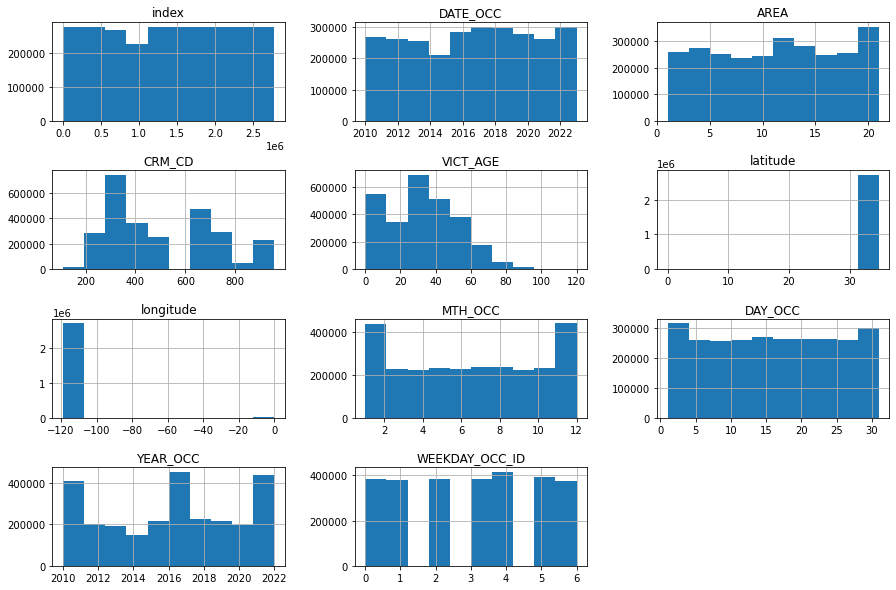

In [24]:
crime_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

## Distribution Features

#### Distribution Of Cimes By Area

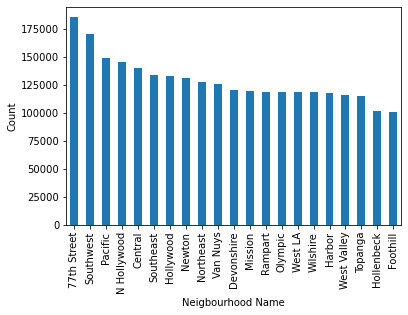

In [25]:
crime_data['AREA_NAME'].value_counts().plot(kind='bar')
plt.xlabel('Neigbourhood Name')
plt.ylabel('Count')
plt.show()

#### Distribution Of Crimes by Crime Description

In [26]:
crime_data['CRM_CD_DESC'].value_counts()

BATTERY - SIMPLE ASSAULT                                   236262
VEHICLE - STOLEN                                           223696
BURGLARY FROM VEHICLE                                      199956
BURGLARY                                                   182891
THEFT PLAIN - PETTY ($950 & UNDER)                         180188
                                                            ...  
TILL TAP - ATTEMPT                                              4
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              4
TRAIN WRECKING                                                  2
FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)         1
DRUNK ROLL - ATTEMPT                                            1
Name: CRM_CD_DESC, Length: 143, dtype: int64

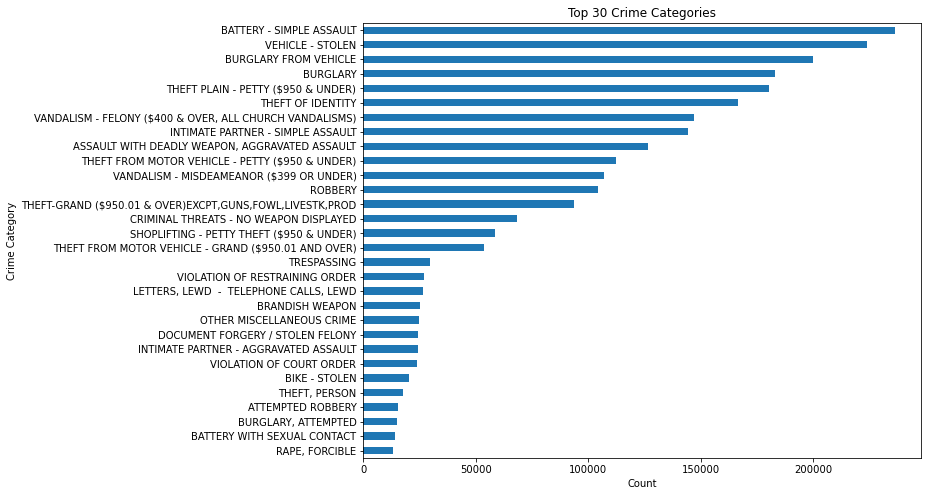

In [27]:
# Get the top 30 crime categories by value counts
top_30_crimes = crime_data['CRM_CD_DESC'].value_counts().head(30)

# Create the bar graph
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
top_30_crimes.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Crime Category')
plt.title('Top 30 Crime Categories')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most frequent crimes at the top
plt.show()

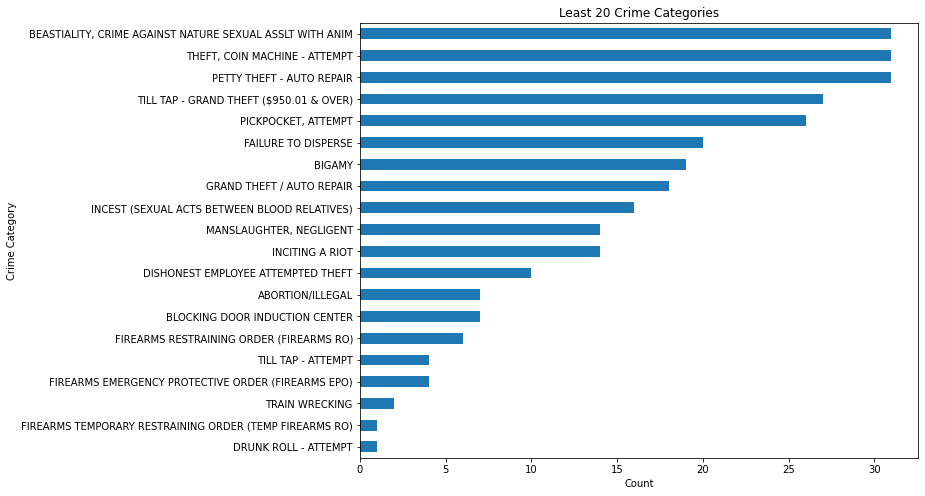

In [28]:
# Get the least crime categories by value counts
least_20_crimes = crime_data['CRM_CD_DESC'].value_counts().tail(20)

# Create the bar graph
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
least_20_crimes.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Crime Category')
plt.title('Least 20 Crime Categories')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most frequent crimes at the top
plt.show()

#### Crime occurance frequency by Area & Type (2010 to Sep 2023)

In [29]:
#Code task 14#
# Calculate  count of crime type by area sort by the average of the two

crime_area_type_count = crime_data.groupby(['AREA_NAME', 'CRM_CD_DESC']).size().reset_index(name='CRIME_COUNT')
sorted_crime_area_type_count = crime_area_type_count.sort_values(by='CRIME_COUNT', ascending=False)
print(crime_area_type_count.head(5))
print(crime_area_type_count.describe().T)

     AREA_NAME                                     CRM_CD_DESC  CRIME_COUNT
0  77th Street                                           ARSON          494
1  77th Street    ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER          166
2  77th Street  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        15699
3  77th Street                               ATTEMPTED ROBBERY         1672
4  77th Street                        BATTERY - SIMPLE ASSAULT        18007
              count         mean          std  min   25%   50%     75%  \
CRIME_COUNT  2674.0  1012.412117  2462.045847  1.0  12.0  80.0  461.75   

                 max  
CRIME_COUNT  19276.0  


#### Data Distrubution based on occurance date

2023 is not ended yet, so data on 2023 figure is not reliable. However, 2022 is the highest crime rate.

   YEAR_OCC  CRIME_COUNT
0      2010       208324
1      2011       199914
2      2012       200976
3      2013       192052
4      2014       148745
             count           mean           std       min       25%       50%  \
YEAR_OCC      13.0    2016.000000      3.894440    2010.0    2013.0    2016.0   
CRIME_COUNT   13.0  208245.384615  22339.017061  148745.0  199914.0  208441.0   

                  75%       max  
YEAR_OCC       2019.0    2022.0  
CRIME_COUNT  225020.0  233284.0  


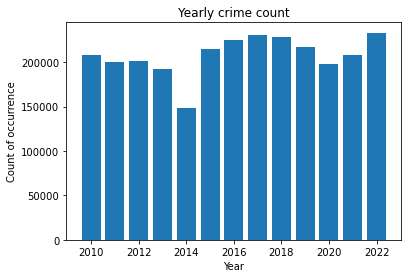

In [30]:
crime_count_by_occ = crime_data.groupby(['YEAR_OCC']).size().reset_index(name='CRIME_COUNT')
print(crime_count_by_occ.head(5))
print(crime_count_by_occ.describe().T)


# Create a bar plot
plt.bar(crime_count_by_occ['YEAR_OCC'], crime_count_by_occ['CRIME_COUNT'])
plt.xlabel('Year')
plt.ylabel('Count of occurrence')
plt.title('Yearly crime count')
#plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.show()


##### What day of the week is the highest crime occurance ?

Friday is the highest occurance of crimes.However,the rest of the days are relatively similar in volumns. There is the significant difference.

  WEEKDAY_OCC  CRIME_COUNT
0      Friday       415950
1      Monday       385303
2    Saturday       390957
3      Sunday       373695
4    Thursday       381652
5     Tuesday       377555
6   Wednesday       382078
             count           mean           std       min       25%       50%  \
CRIME_COUNT    7.0  386741.428571  13995.418189  373695.0  379603.5  382078.0   

                  75%       max  
CRIME_COUNT  388130.0  415950.0  


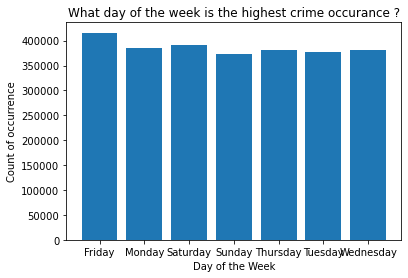

In [31]:

crime_count_by_weekday = crime_data.groupby(['WEEKDAY_OCC']).size().reset_index(name='CRIME_COUNT')
print(crime_count_by_weekday.head(7))
print(crime_count_by_weekday.describe().T)


# Create a bar plot
plt.bar(crime_count_by_weekday['WEEKDAY_OCC'], crime_count_by_weekday['CRIME_COUNT'])
plt.xlabel('Day of the Week')
plt.ylabel('Count of occurrence')
plt.title('What day of the week is the highest crime occurance ?')
#plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.show()


## Save data for stastical data exploration( EDA)

In [32]:
crime_data.shape

(2707190, 19)

In [33]:
# Specify the file path where you want to save the CSV file
file_path = "../data/interim/" + "cleaned_crime_data.csv"

# Save the DataFrame to a CSV file
crime_data.to_csv(file_path, index=False)  # Set index=False to exclude the DataFrame index in the CSV file